# CSCI B500 &mdash; Data Science: Time Series and Simple Linear Regression 
* **Time series**: Sequences of values (**observations**) associated with points in time
    * [daily closing stock prices](https://www.marketwatch.com/investing/stock/AMZN/charts)
    * [hourly temperature readings](http://coolwx.com/usstats/tempstats.php)
    * [changing positions of a plane in flight](https://www.flightradar24.com/blog/flightradar24-data-regarding-the-crash-of-ethiopian-airlines-flight-302/)
    * [annual crop yields](https://www.nass.usda.gov/Charts_and_Maps/Field_Crops/index.php) 
    * [quarterly company profits](https://www-statista-com.ezproxy.uscb.edu/statistics/222127/quarterly-corporate-profits-in-the-us/) (Note: requires USCB login)
    * [time-stamped tweets from Twitter users worldwide](https://twitterdev.github.io/do_more_with_twitter_data/timeseries.html)
* We’ll use simple linear regression to make predictions from time series data

### Time Series
* **Univariate time series**: _One_ observation per timepoint [\[example\]](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/08/Line-Plot-of-Monthly-Car-Sales.png)
* **Multivariate time series**: _Two or more_ observations per timepoint [\[example\]](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/06/Line-Plots-of-Air-Pollution-Time-Series-1024x768.png)
* Two tasks often performed with time series are:
    * **Time series analysis**, which looks at existing time series data for patterns (like **seasonality** [\[example\]](https://www-statista-com.ezproxy.uscb.edu/chart/16211/monthly-video-game-industry-sales/)), helping data analysts understand the data
    * **Time series forecasting**, which uses past data to predict the future [\[interesting short video\]](https://www.youtube.com/watch?v=wGUV_XqchbE)
* We’ll perform time series forecasting

### Simple Linear Regression
* Given a collection of values representing an **independent variable** (the month/year combination) and a **dependent variable** (the average high temperature for that month/year), simple linear regression describes the relationship between these variables with a straight line, known as the **regression line**

### Linear Relationships
* Given a Fahrenheit temperature, we can calculate the corresponding Celsius temperature using:
>```python
c = 5 / 9 * (f - 32)
```
* `f` (the Fahrenheit temperature) is the _independent variable_
* `c` (the Celsius temperature) is the _dependent variable_
* Each value of `c` _depends on_ the value of `f` used in the calculation

### Linear Relationships (cont.)
* Plotting Fahrenheit temperatures and their corresponding Celsius temperatures produces a straight line

In [1]:
# enable high-res images in notebook 
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
c = lambda f: 5 / 9 * (f - 32)

In [2]:
temps = [(f, c(f)) for f in range(0, 101, 10)]

* Place the data in a `DataFrame`, then use its **`plot` method** to display the linear relationship between the temperatures
* `style` keyword argument controls the data’s appearance
    * `'.-'` indicates that each point should appear as a dot, and that lines should connect the dots

In [3]:
import pandas as pd

In [4]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

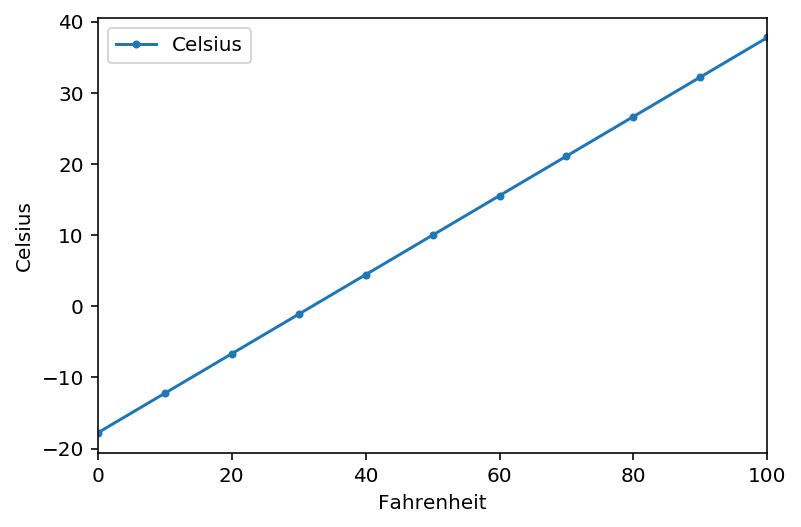

In [5]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

### Components of the Simple Linear Regression Equation 
The points along any straight line can be calculated with:

\begin{equation}
y = m x + b
\end{equation}

* **_m_** is the line’s **`slope`**,
* **_b_** is the line’s **`intercept** with the **_y_-axis** (at **_x_** = 0), 
* **_x_** is the independent variable (the date in this example)
* **_y_** is the dependent variable (the temperature in this example)
* In simple linear regression, **_y_** is the _predicted value_ for a given **_x_**

Here's a fairly simple walkthrough of the mathematics behind linear regression:  
https://www.mathsisfun.com/data/least-squares-regression.html

### Function `linregress` from the SciPy’s `stats` Module
* Simple linear regression determines slope (**_m_**) and intercept (**_b_**) of a straight line that best fits your data
* Following diagram shows a few of the time-series data points we’ll process in this section and a corresponding regression line
    * Note that vertical lines added to indicate each data point’s **distance from the regression line**

![A few time series data points and a regression line](linregress_images/distance.png "A few time series data points and a regression line")

* Simple linear regression algorithm *iteratively* adjusts the slope and intercept and, for each adjustment, calculates the square of each point’s distance from the line
* <span style="background: yellow;">“Best fit” occurs when slope and intercept values **minimize sum of those squared distances**</span>
    * This is known as an **ordinary least squares** calculation
    * Question for you: Why *squared* distance?
* **SciPy (Scientific Python)** is widely used for engineering, science and math in Python
    * **`linregress`** function (from the **`scipy.stats` module**) performs simple linear regression for you
    * `linregress` documentation (with example code!): https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Getting Weather Data from NOAA
* The National Oceanic and Atmospheric Administration (NOAA) offers public historical data including time series for average high temperatures in specific cities over various time intervals
* Obtained the January average high temperatures for New York City from 1895 through 2018 from NOAA’s “Climate at a Glance” time series at: 
> https://www.ncdc.noaa.gov/cag/
* See the file `ave_hi_nyc_jan_1895-2018.csv` **(should be in the same folder as this notebook)**
* Three columns per observation:
    * `Date`—A value of the form `'YYYYMM’` (such as `'201801'`). `MM` is always `01` because we downloaded data for only January of each year. 
    * `Value`—A floating-point Fahrenheit temperature.
    * `Anomaly`—The difference between the value for the given date and average values for all dates **(will not used in this example)**

### Loading the Average High Temperatures into a `DataFrame` 

In [6]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

* Get a sense of the data

In [7]:
nyc.head()

Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0

In [8]:
nyc.tail()

Date  Value  Anomaly
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3

### Cleaning the Data
* For readability, rename the `'Value'` column as `'Temperature'`

In [9]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [10]:
nyc.head(3)

Date  Temperature  Anomaly
0  189501         34.2     -3.2
1  189601         34.7     -2.7
2  189701         35.5     -1.9

* Seaborn labels the tick marks on the **_x_**-axis with `Date` values
* **_x_**-axis labels will be more readable if they do not contain `01` (for January), so we’ll remove it from each `Date`
* Check the column’s type:

In [11]:
nyc.Date.dtype

dtype('int64')

* The date values (in the format YYYYMM) are **integers**, so we can divide by 100 to **truncate the last two digits** to leave only the four-digit year
* `Series` method `floordiv` performs _integer division_ on every element of the `Series`

In [12]:
nyc.Date = nyc.Date.floordiv(100)

In [13]:
nyc.head(3)

Date  Temperature  Anomaly
0  1895         34.2     -3.2
1  1896         34.7     -2.7
2  1897         35.5     -1.9

### Calculating Basic Descriptive Statistics for the Dataset
* Call `describe` on the `Temperature` column

In [14]:
pd.set_option('precision', 2)

In [15]:
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Forecasting Future January Average High Temperatures
* The **SciPy (Scientific Python) library** is widely used for engineering, science and math in Python
* **`stats` module** provides function **`linregress`**, which calculates a regression line’s _slope_ and _intercept_ 

In [16]:
from scipy import stats

In [17]:
linear_regression = stats.linregress(x=nyc.Date,
                                     y=nyc.Temperature)

* `linregress` receives two one-dimensional arrays of the same length representing the data points’ **_x_**- and **_y_**-coordinates
    * `x`and `y` represent the independent and dependent variables, respectively
* Returns the regression line’s `slope` and `intercept`

In [18]:
linear_regression.slope

0.014771361132966163

In [19]:
linear_regression.intercept

8.694993233674289

* Use these values with the simple linear regression equation for a straight line to predict the average January temperature in New York City for a given year
* In the following calculation, `linear_regression.slope` is **_m_**, `2019` is **_x_** (the date value for which you’d like to predict the temperature), and `linear_regression.intercept` is **_b_**:

In [20]:
# remember, y = m*x + b (where y is the predicted temperature,
# given the model produced by linear regression)
linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

* For comparison, what was NYC's **actual** high temperature in January 2019? 
> Use the NOAA site linked above, then in the space below, copy-paste the URL after you find the data you're looking for **(change the cell to 'markdown' if it's not set already)**

https://www.ncdc.noaa.gov/cag/city/time-series/USH00305801/tmax/1/1/1895-2019

* Approximate the average temperature for January of 1890:


In [21]:
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

* We had data for 1895–2018
* **You should expect that the further you go outside this range, the less reliable the predictions will be**
> In the cells below, try computing the predicted temperatures for the years 1000 and 3000...

In [22]:
linear_regression.slope * 1000 + linear_regression.intercept

23.466354366640452

In [23]:
linear_regression.slope * 3000 + linear_regression.intercept

53.00907663257278

### Plotting the Average High Temperatures and a Regression Line
* Seaborn’s **`regplot` function** plots each data point with the dates on the **_x_****-axis and the temperatures on the **_y_**-axis
* Creates a **scatter plot** or **scattergram** representing the `Temperature`s for the given `Date`s and adds the regression line
* Function `regplot`’s `x` and `y` keyword arguments are one-dimensional arrays of the same length representing the **_x-y_** coordinate pairs to plot

In [24]:
import seaborn as sns

In [25]:
sns.set_style('whitegrid')

(10, 70)

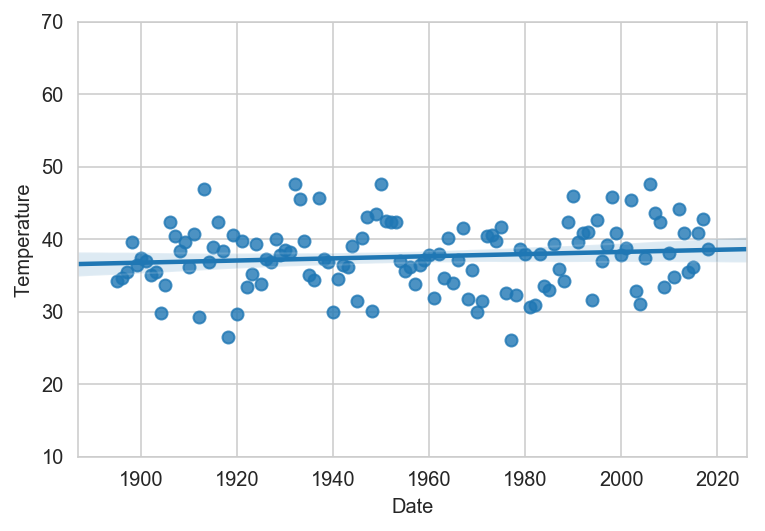

In [26]:
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

* In this graph, the _y_-axis represents a 21.5-degree temperature range between the minimum of 26.1 and the maximum of 47.6
* By default, the data appears to be spread significantly above and below the regression line, making it difficult to see the linear relationship
* Common issue in data analytics visualizations
* Seaborn and Matplotlib _auto-scale_ the axes, based on the data’s range of values
* We scaled the **_y_**-axis range of values to emphasize the linear relationship

### Getting Time Series Datasets

| Sources time-series dataset
| ------------------
| https://data.gov/ 
| This is the U.S. government’s open data portal. Searching for “time series” yields over 7200 time-series datasets.
| https://www.ncdc.noaa.gov/cag/`
| The National Oceanic and Atmospheric Administration (NOAA) Climate at a Glance portal provides both global and U.S. weather-related time series.
| https://www.esrl.noaa.gov/psd/data/timeseries/
| NOAA’s Earth System Research Laboratory (ESRL) portal provides monthly and seasonal climate-related time series.
| https://www.quandl.com/search
| Quandl provides hundreds of free financial-related time series, as well as fee-based time series.
| https://datamarket.com/data/list/?q=provider:tsdl *** NOTE! At this time the URL is marked "unsafe" (could be a temporary server issue)
| The Time Series Data Library (TSDL) provides links to hundreds of time series datasets across many industries.
| http://archive.ics.uci.edu/ml/datasets.html
| The University of California Irvine (UCI) Machine Learning Repository contains dozens of time-series datasets for a variety of topics.
| http://inforumweb.umd.edu/econdata/econdata.html
| The University of Maryland’s EconData service provides links to thousands of economic time series from various U.S. government agencies. 

------                

### For some more practice with creating plots, let's try writing a **script** that implements the example from the SciPy linregress documentation:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

Start by creating a script (in this folder) with the filename `linregress_example.py`, and then copy-paste the code (but don't copy the ">>>" prompt) and include comments. Try running your script from right here in the notebook!

slope: 1.944864    intercept: 0.268578
R-squared: 0.735498


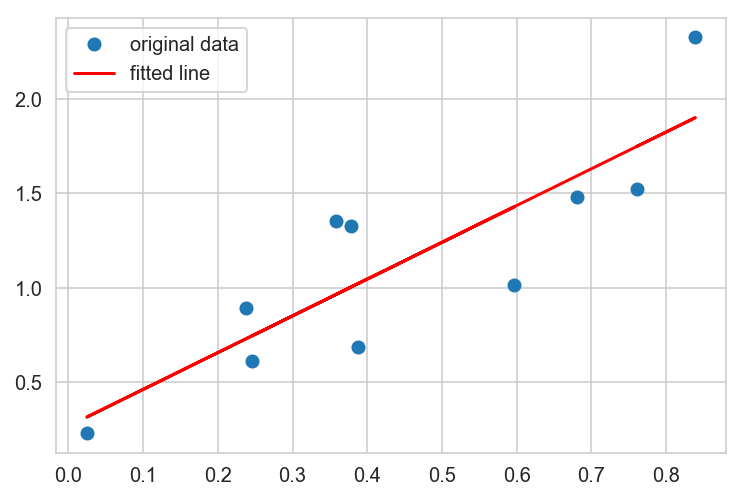

<Figure size 432x288 with 0 Axes>

In [28]:
run linregress_example.py

-----

Now, let's find a *different* time-series dataset and perform a linear regression analysis on that data... 

Quandle account to get the data

https://www.quandl.com/api/v3/datasets/EOD/XOM.csv?api_key=hJxsUAzpE1Nws2isNxxX